In [1]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np

# A method that gives the maximum PageRank list of a graph file

def getMaximumPageRankList(filename):

  file_ = open(filename, 'r')




  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:12]
    
      if graph_number == "Graph Number":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 
  filetowrite = filename[:-4]+"_Pagerank_Max.txt"
  file1 = open(filetowrite,'w')

  graphNumber = len(ultimate_graphList)
# Iterating every graph
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    graphEdgeNumber = len(ultimate_graphList[i])
    max_pagerank_vertices = 0 # defining variable for detecting max pagerank
  #making the graph
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
    weighted_Feature_Set = nx.pagerank(G)

    file1.write(str(i+1)+"\n")
    for key,val in weighted_Feature_Set.items():
      if val > max_pagerank_vertices:
        max_pagerank_vertices = val
        max_id = key
    file1.write(str(max_id)+str(" -----> ")+str(max_pagerank_vertices)+"\n")
  


  file1.close()

file_overview = 'overView.txt'
file_dosoverview = 'replayOverView.txt'



#getMaximumPageRankList(file_overview)
getMaximumPageRankList(file_dosoverview)




  

  






In [ ]:
# list1 = []

# def fun(filename):

#   file_ = open(filename, 'r')




#   graphList = []
#   ultimate_graphList = []  
#   graphCounter = 0
#   while True: 
  
#     # Get next line from file 
#       line = file_.readline() 
  
#     # if line is empty 
#     # end of file is reached 
#       if not line: 
#           break
    

    
#       graph_number = line[0:12]
    
#       if graph_number == "Graph Number":
#       #print(graph_number+str(graphCounter))
#         graphCounter += 1
#         line = file_.readline()
#         line = file_.readline()
#         line = file_.readline()
#         list1.append(line.split())

#         if graphCounter >= 2:
#           ultimate_graphList.append(graphList)
#           graphList = []



#   ultimate_graphList.append(graphList)
    
#   file_.close()


# fun('/content/replayOverView.txt')

# print(len(list1))
# print(list1)
# actual_attacked = []
# for i in range(0, len(list1)):
#   if list1[i][1] == "False":
#     actual_attacked.append(i+1)

# print(len(actual_attacked))
# print(actual_attacked) 

659
[['04b0', '-->', '05a0', '0316', '04b0', '0370', '059b', '05a2', '0690', '0545', '05e4', '0153', '04f1', '02c0', '0164', '0120'], ['04b1', '-->', '04b1', '0370', '04f2', '043f', '0153', '0545', '0316', '018f', '0080', '0164'], ['0081', '-->', '0081', '0165', '018f', '0153', '02a0'], ['0081', '-->', '0081', '0153', '0165', '0260', '018f', '0164'], ['01f1', '-->', '01f1', '0316', '0220', '02a0', '0329', '0153', '0164', '0120'], ['0370', '-->', '0370', '0440', '043f', '0382', '0164', '01f1', '00a0'], ['04b1', '-->', '04b1', '0164', '0587', '0510', '0545', '059b', '0110', '0370', '0220', '043f', '0153', '04f2', '0165'], ['0260', '-->', '0260', '02a0', '0165', '0080', '02b0', '018f'], ['0350', '-->', '0350', '04f0', '0382', '0164', '04f2', '04b1'], ['0545', '-->', '0545', '0018', '0370', '00a0', '04b1', '043f', '04f0', '0153', '0120', '05a2', '0164', '01f1', '0220', '05e4', '0110', '0350'], ['0382', '-->', '0382', '04f2', '0350', '0153', '0545', '04b0'], ['0316', '-->', '0316', '0329', 

In [2]:
import numpy as np
#Reading the maximum page rank list for overview and dosoverview
def showlist(filename):

  list1 = []
  file2 = open(filename, 'r')

  while True: 
  
    # Get next line from file 
      line = file2.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
      list1.append(line.split())
  
  file2.close()

  len_list = len(list1)
  list_view = []
  
  for i in range(0, len_list):
    if len(list1[i]) > 1:
      list_view.append(float(list1[i][2]))
  

  return list_view

list_oview_mn = showlist('/content/overView_Pagerank_Min.txt')
list_dview_mx = showlist('/content/replayOverView_Pagerank_Max.txt')


print("length of overview---->"+str(len(list_oview_mn)))
print("Overview_list------>"+ str(list_oview_mn))

print("length of fuzzyoverview---->"+str(len(list_dview_mx)))
print("fuzzyOverview_list------>"+ str(list_dview_mx))

# 0 means attacked graph and 1 means attack free graph
# It will be detecting confusion matrix

actual = np.zeros(len(list_dview_mx))
predicted = np.ones(len(list_dview_mx))



threshold = np.median(list_oview_mn) + 3*np.std(list_oview_mn) 
#minnn = np.median(list_oview_mn) + 5*np.std(list_oview_mn)
detected_attack = []
ld = len(list_dview_mx)
for i in range (0, ld):
  if list_dview_mx[i] > threshold: 
    detected_attack.append(i+1)
    predicted[i] = 0

# for i in range(0, len(actual_attacked)):

actual_attacked = [i for i in range (1,660)]


undetected = set(actual_attacked)-set(detected_attack)
wrong_detection = set(detected_attack ) - set(actual_attacked)
print("Length of undetected attack---->"+str(len(undetected)))
print("Undetected List----->"+str(undetected))

print("Length of wrong detection---->"+str(len(wrong_detection)))
print("Wrong detection List---->"+str(wrong_detection))

length of overview---->18565
Overview_list------>[0.016677714846090454, 0.016522395460077763, 0.016405861231623044, 0.016199533924033966, 0.012178421969005954, 0.0169997169503331, 0.013760076421444178, 0.012869099425270827, 0.014374741113268516, 0.012171342457493708, 0.012434322228465685, 0.015297746187348246, 0.016848651512936144, 0.01821080800997491, 0.01776842451900338, 0.018114794172965392, 0.016759343658022164, 0.018095272077290104, 0.016177207209782073, 0.011495234496934256, 0.014388009888950778, 0.012789899794574674, 0.012700896871119586, 0.014927786022119752, 0.014412000697444746, 0.017707581042057403, 0.015081432099894515, 0.01718391050156929, 0.01360991676504535, 0.01634132239506234, 0.016530892232640506, 0.016462511045264878, 0.013495708165630066, 0.016193467664669642, 0.017884438303249543, 0.018172335028991342, 0.017229270240876886, 0.015954448266792307, 0.011089624873024222, 0.012215680682052789, 0.012819181164903694, 0.01282211105144019, 0.013676565416275679, 0.0139191744

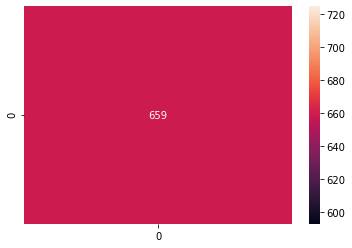

In [3]:
# for confusion matrix... 0 for attacked graph 1 for attackfree graph

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
cm = confusion_matrix(actual, predicted)



sn.heatmap(cm, annot=True, fmt = "")


In [4]:
#it gives the all score regarding the system

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(actual, predicted, digits = 5))


              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000       659

    accuracy                        1.00000       659
   macro avg    1.00000   1.00000   1.00000       659
weighted avg    1.00000   1.00000   1.00000       659

